# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [1]:
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords', 'maxent_ne_chunker', 'words', 'omw'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\garet\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

True

In [2]:
# import libraries

import numpy as np
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine
import re
from joblib import dump, load

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, recall_score, precision_recall_fscore_support, classification_report
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import time

In [3]:
# load data from database
engine = create_engine('sqlite:///Disaster_Msgs.db')
    
df = pd.read_sql('SELECT * FROM df', engine)
X = df['message'].values
y = df.iloc[:, 4:].values

In [4]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
def random_message():
    random = np.random.randint(df.shape[0]+1)
    message = df.iloc[random,:].message
    categories = ""
    for i, j in enumerate(df.iloc[random,4:]):
        if j == 1:
            if not categories:
                categories += df.iloc[random,4:].index[i]
            else:
                categories += ", "
                categories += df.iloc[random,4:].index[i]
    if not categories:
        categories = "none"
    return [message, categories]

In [5]:
def generate_messages(number):
    random_message_list = []
    for i in range(number):
        random_message_list.append(random_message())
    return random_message_list

In [6]:
generate_messages(10)

[['Processing of horticulture produce and fish for preservation and long - term use was also demonstrated as part of the training sessions.',
  'none'],
 ['ACTED hygiene promoters are active in each village to train rural villagers on good hygiene practices - an education which is useful now, as well as for the future.',
  'related, aid_related, other_aid'],
 ['The Ministry warned farmers and local investors engaged in oilseed cultivation in vulnerable parts of the country to inform agricultural agents quickly of any presence of locusts to enable timely control of the insects with pesticides before they spread.',
  'related'],
 ['The first is to get the agreement of all the various factions in these conflicts and they can be brought into the decision making structure on how these resources will be used.',
  'related'],
 ['Using the local workforce also removes the need to bring in heavy plant equipment, which would be difficult, expensive, and at risk of militia attack once on site.',


### 2. Write a tokenization function to process your text data

In [7]:
def tokenize(text):
    '''Removes punctuation and stopwords, normalise to lowercase and lemmatize'''
    
    tokens = word_tokenize(re.sub(r"[^a-zA-Z0-9]", " ", text).lower())
    tokens = [token for token in tokens if token not in stopwords.words("english")]
    lemmed = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    
    return lemmed

### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [8]:
pipeline = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('clf', MultiOutputClassifier(AdaBoostClassifier(), n_jobs=-1))
     ])

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
start_time = time.time()
pipeline.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 201.67159342765808 seconds ---


In [34]:
#save pipeine
#dump(pipeline, 'saved_pipeline.joblib')

['pipeline_save_gridsearch.joblib']

In [10]:
#load pipeline
pipeline = load('pipeline_save_gridsearch.joblib')

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [11]:
start_time = time.time()
y_pred = pipeline.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


--- 80.3453323841095 seconds ---


In [12]:
def view_results(y_test, y_pred):
    y_test_df = pd.DataFrame(y_test)
    y_pred_df = pd.DataFrame(y_pred)
    
    scores = []
    for column in y_pred_df.columns:
        scores.append(precision_recall_fscore_support(y_test_df[column], y_pred_df[column], average='weighted'))
    
    results_df = pd.DataFrame(scores, columns=['precision', 'recall', 'f1-score', 'drop'], index=df.iloc[:, 4:].columns).drop('drop', axis=1)
    fig, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(results_df, cmap="BuPu", annot=True)
    
    plt.show
    print('--Average results--')
    print(results_df.mean())
    print('')
    print('--Per label results--')
    return results_df

--Average results--
precision    0.935486
recall       0.944177
f1-score     0.935955
dtype: float64

--Per label results--


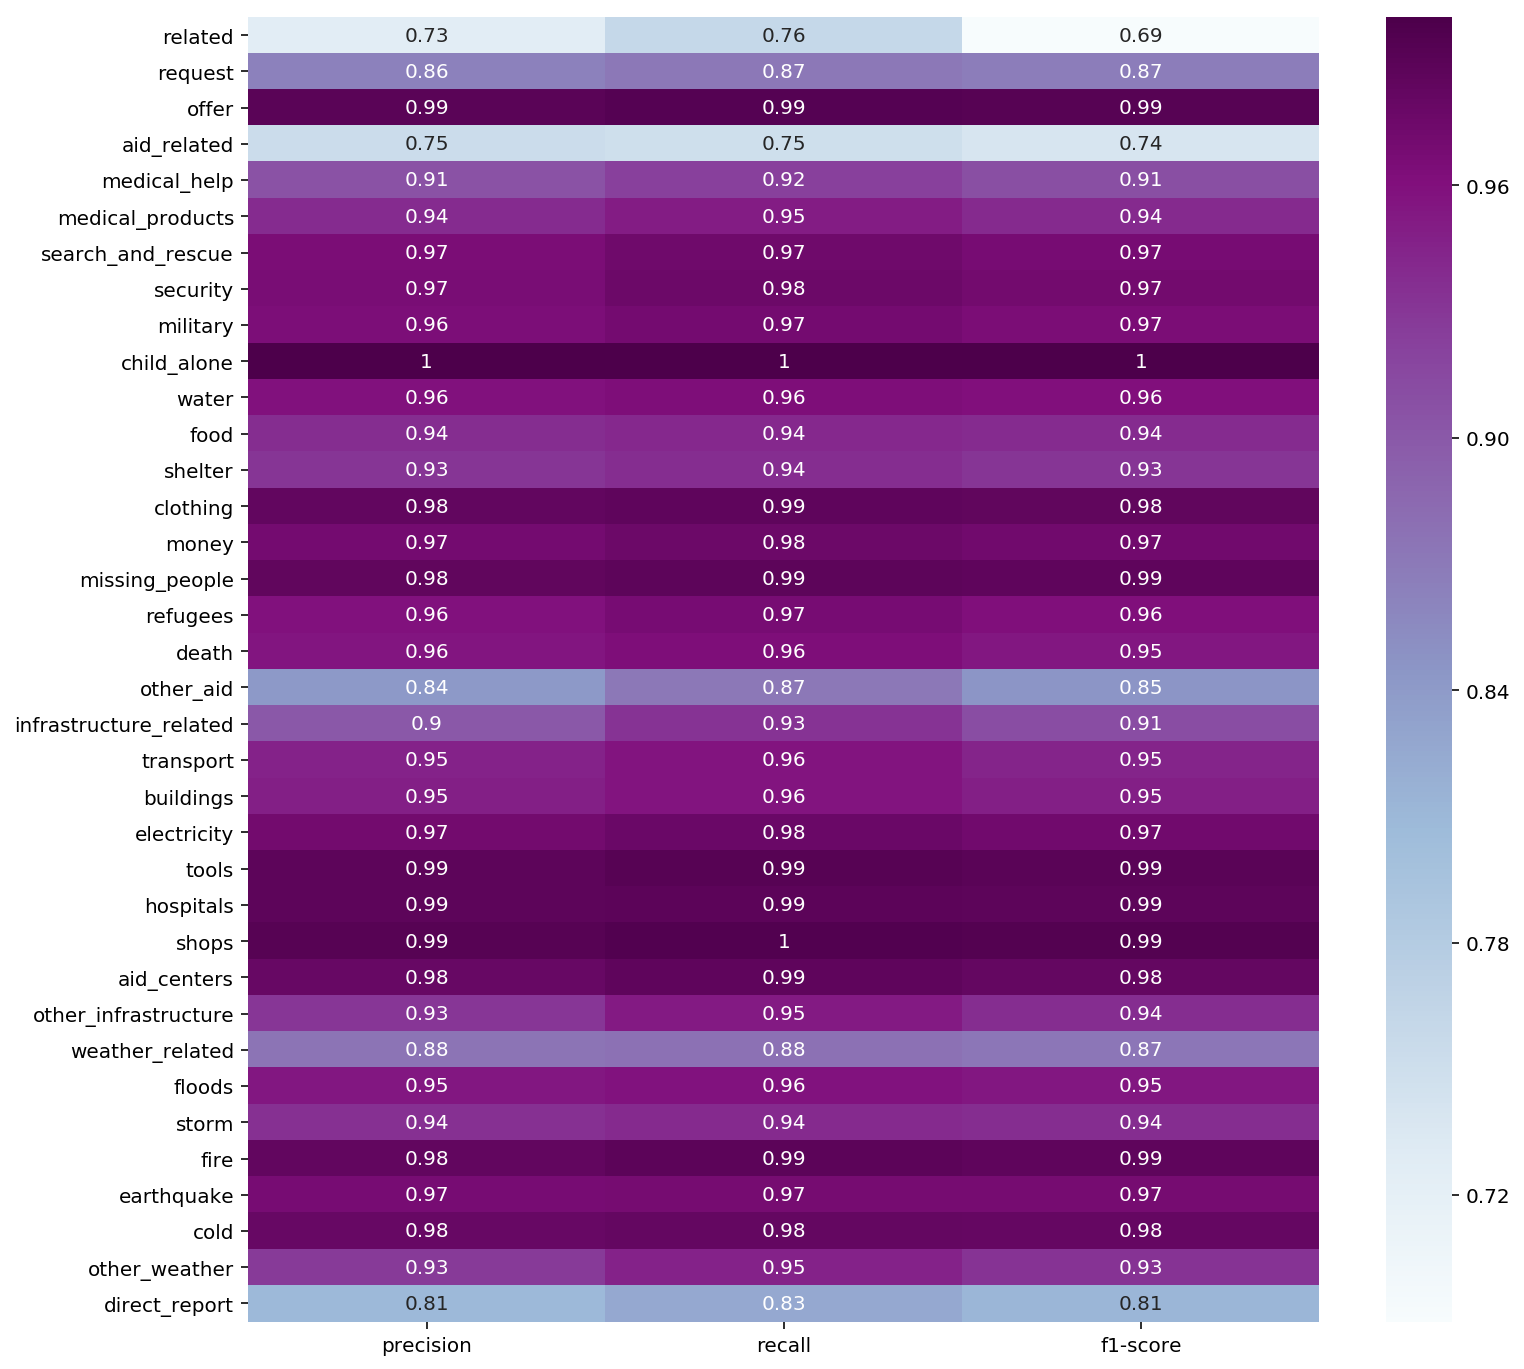

In [39]:
results_df = view_results(y_test, y_pred)

In [40]:
# adding category counts to results
results_df.index = df.columns[4:]
results = results_df.iloc[:, 0:4].apply(lambda x: round(x,3))

In [41]:
categories = df.iloc[:, 4:].columns.tolist()
totals = df.iloc[:, 4:].sum().tolist()

In [16]:
total_per_category = pd.DataFrame({'Categories': categories, 
                    'Totals': totals})

In [44]:
total_per_category

,Categories,Totals
0,related,20282
1,request,4474
2,offer,118
3,aid_related,10860
4,medical_help,2084
5,medical_products,1313
6,search_and_rescue,724
7,security,471
8,military,860
9,child_alone,0


In [45]:
results['occurences'] = total_per_category['Totals'].values

In [47]:
results = results.sort_values('occurences')

In [53]:
results.index.name = "Categories"

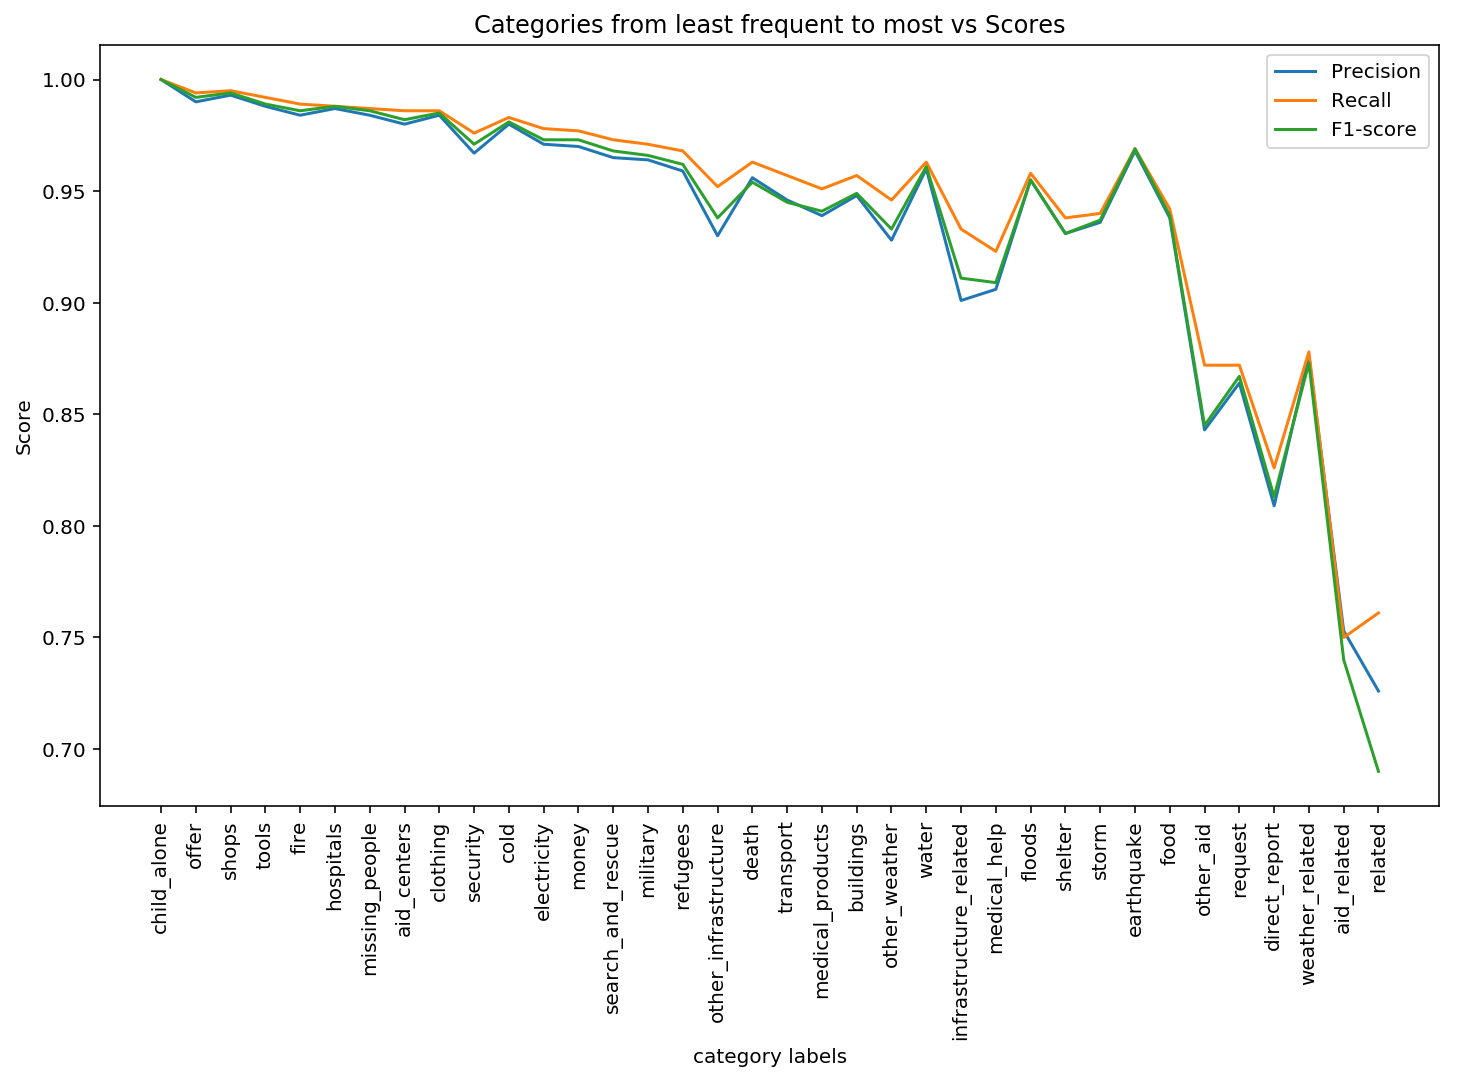

In [55]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set(xlabel='category labels', ylabel='Score', title='Categories from least frequent to most vs Scores')
ax.plot(results.iloc[:, 0:3]);
plt.xticks(rotation=90)
plt.legend(['Precision', 'Recall', 'F1-score'])
plt.show()

In [56]:
# changing index for_results_by_category_count to number of categories instead of category names
results_by_category_count = results.copy(deep=True)
results_by_category_count.index = results_by_category_count.occurences

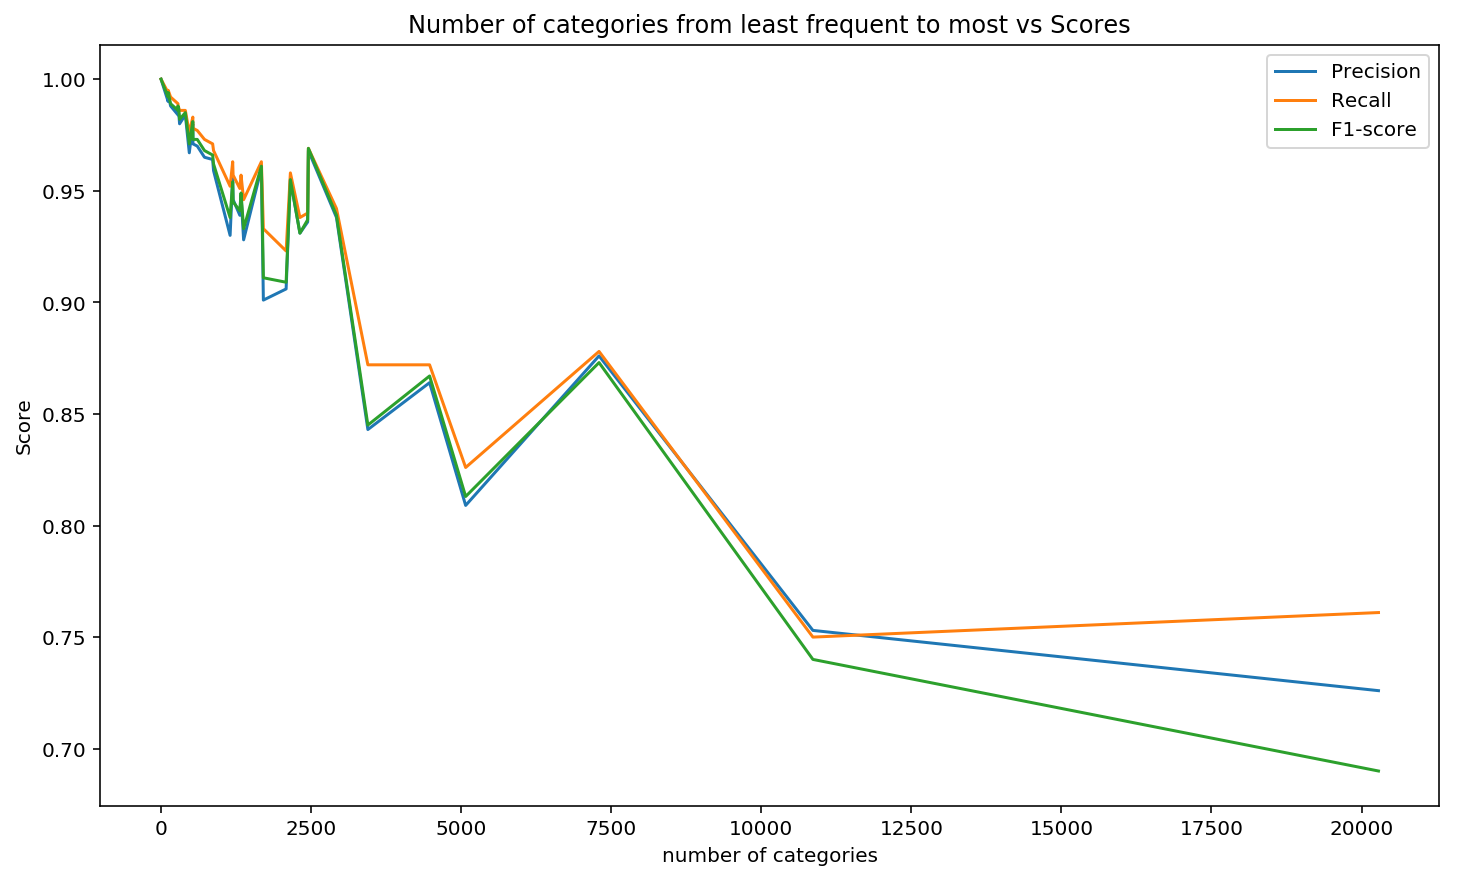

In [57]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set(xlabel='number of categories', ylabel='Score', title='Number of categories from least frequent to most vs Scores')
ax.plot(results_by_category_count.iloc[:, 0:3]);
plt.legend(['Precision', 'Recall', 'F1-score'])
plt.show()

In [58]:
results.to_sql('results', engine, if_exists='replace')

In [26]:
results_test = pd.read_sql('SELECT * FROM results', engine)

In [27]:
results_test

,index,precision,recall,f1-score,total_categories
0,child_alone,1.000,1.000,1.000,0
1,offer,0.990,0.994,0.992,118
2,shops,0.993,0.995,0.994,120
3,tools,0.988,0.992,0.989,159
4,fire,0.984,0.989,0.986,282
5,hospitals,0.987,0.988,0.988,283
6,missing_people,0.984,0.987,0.986,298
7,aid_centers,0.980,0.986,0.982,309
8,clothing,0.984,0.986,0.985,405
9,security,0.967,0.976,0.971,471


In [24]:
pipeline.get_params()

{'cv': 'warn',
 'error_score': 'raise-deprecating',
 'estimator__memory': None,
 'estimator__steps': [('vect',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
           dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
           lowercase=True, max_df=1.0, max_features=None, min_df=1,
           ngram_range=(1, 1), preprocessor=None, stop_words='english',
           strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
           tokenizer=<function tokenize at 0x0000021EED9C69D8>,
           vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
             learning_rate=1.0, n_estimators=50, random_state=None),
              n_jobs=None))],
 'estimator__vect': CountVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding=

### 6. Improve your model
Use grid search to find better parameters. 

In [20]:
parameters = {
    'clf__estimator__n_estimators': [50, 100],
    'clf__estimator__learning_rate': [1.0, 0.3],    
    'vect__ngram_range': ((1, 1), (1,2))
    }

In [11]:
parameters = {
    'clf__estimator__n_estimators': [100],
    'clf__estimator__learning_rate': [1.0],    
    'tfidf__use_idf': [False],
    'vect__max_df': [0.75],
    'vect__ngram_range': [((1,2))]
    }

In [21]:
cv2 = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1)

In [22]:
start_time = time.time()
cv2.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
exception calling callback for <Future at 0x24ed06b0b70 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 759, in dispatch

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

In [ ]:
dump(cv2, 'gridsearch2.joblib')

In [14]:
#save pipeine
dump(cv, 'gridsearch1.joblib')

['gridsearch1.joblib']

In [19]:
pd.DataFrame(cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__estimator__learning_rate,param_clf__estimator__n_estimators,param_tfidf__use_idf,param_vect__max_df,param_vect__ngram_range,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,416.876547,4.329608,234.819603,3.383187,1,100,False,0.75,"(1, 2)","{'clf__estimator__learning_rate': 1.0, 'clf__e...",...,0.218493,0.218035,0.221137,0.004068,1,0.274336,0.257705,0.258239,0.263427,0.007717


In [60]:
start_time = time.time()
y_pred = pipeline.predict(X_test)
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.185462951660156 seconds ---


In [49]:
view_results(y_test, y_pred)

ValueError: Shape of passed values is (4, 36), indices imply (4, 37)

In [15]:
cv.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([416.87654734]),
 'std_fit_time': array([4.3296079]),
 'mean_score_time': array([234.81960336]),
 'std_score_time': array([3.38318719]),
 'param_clf__estimator__learning_rate': masked_array(data=[1.0],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_clf__estimator__n_estimators': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_tfidf__use_idf': masked_array(data=[False],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__max_df': masked_array(data=[0.75],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_vect__ngram_range': masked_array(data=[(1, 2)],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__estimator__learning_rate': 1.0,
   'clf__estimator__n_estimators': 100,
   'tfidf__use_idf': False,
   'vect__max_df': 0.75,
   'vect_

In [16]:
cv.best_score_

0.2211372190011189

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

### 9. Export your model as a pickle file

In [ ]:
# saving file as .joblib
dump(pipeline, 'saved_pipeline.joblib')

### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.